In [ ]:
from pytorch_fast_elmo import FastElmo, batch_to_char_ids
import sys
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy
import matplotlib.pyplot as plt
import random


In [11]:
def plot_hierarchically(vecs, labels):

    Z = linkage(vecs, optimal_ordering  = False, method = "ward")
    order = scipy.cluster.hierarchy.leaves_list(Z)
    labels_with_indices = zip(labels, order)
    labels_with_indices = sorted(labels_with_indices, key = lambda tup: tup[1])
    labels_sorted, _ = list(zip(*labels_with_indices))
    plt.figure()
    dendrogram(Z, labels = labels_sorted, leaf_font_size = 10, orientation = "left", color_threshold = 0)  
    plt.show()
    
def load_sents(fname = "sents_f", max_length = None):
    
    with open(fname, "r") as f:
              
        lines = f.readlines()
    
    lines =  [line.strip().split(" ") for line in lines]
    if max_length is not None:
        lines = list(filter(lambda sentence: len(sentence) < max_length, lines))
    return lines

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

Load pretrained ELMO and a collection of Wikipedia sentences.

In [12]:
all_sentences = load_sents(max_length = 15)
options_file = 'elmo_2x4096_512_2048cnn_2xhighway_options.json'
weight_file = 'elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5'
elmo = FastElmo(options_file, weight_file)

collect ELMO states over a collection of sentences.

In [13]:
num_sentences = 50
sentences = all_sentences[:num_sentences] # load random sentences from wikipedia
character_ids = batch_to_char_ids(sentences)
embeddings = elmo(character_ids) # collect elmo states

perform hierarchical clustering on a sample of sentences.

founder of petty enterprises , level cross , north carolina , near greensboro .


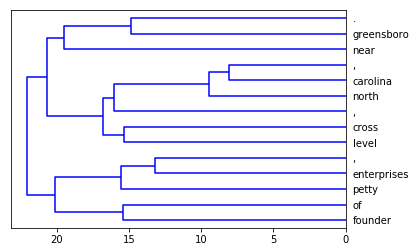

this resolved catalan 's conjecture for all but a finite number of cases .


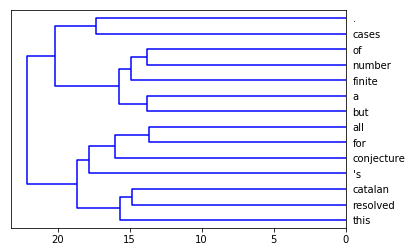

trains will reach top speeds of 250 kilometres per hour on this line .


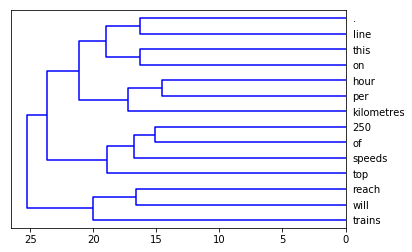

writing on yourself in pen ink is not harmful by almost any means .


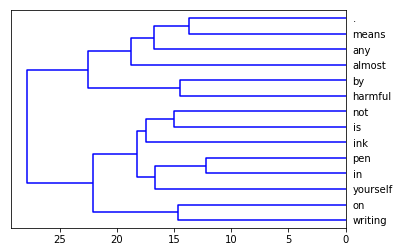

the village was enhanced in june 2005 by the addition of a pharmacy .


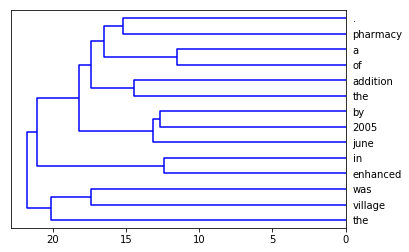

worthy of note , of course , is that we have different counsel .


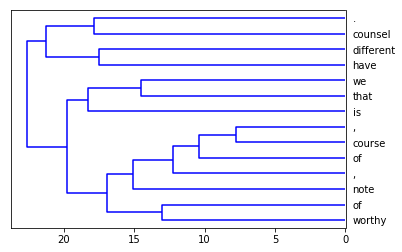

he attacked the bowling immediately , [ 8 ] sharing a large partnership .


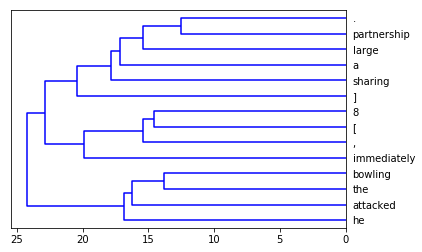

serbia claims all of kosovo , turkey does not claim all of cyprus .


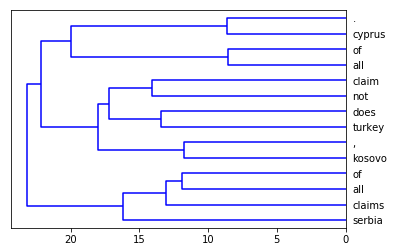

he plays the title character in the 2013 feature film the lone ranger .


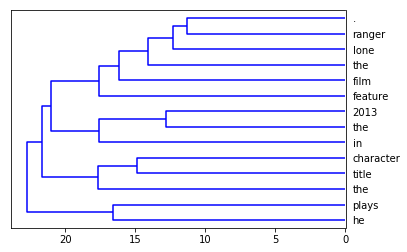

she was recognized for her outstanding research in 2004 with the thomas c .


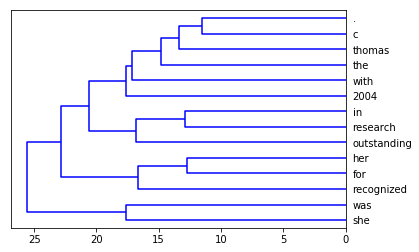

this fire was put out by the end of the day , however .


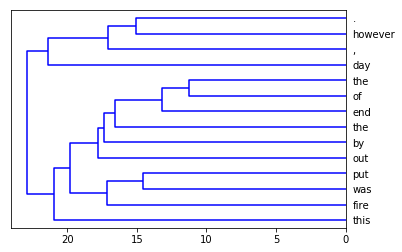

again , this is a matter of personal preference and not a must .


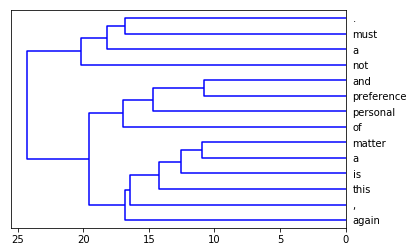

he served in the vermont senate from 1851 to 1852 was senate president .


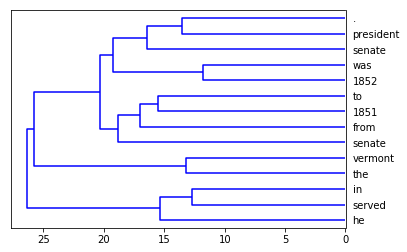

he died in the attempt , though , and was buried at sea .


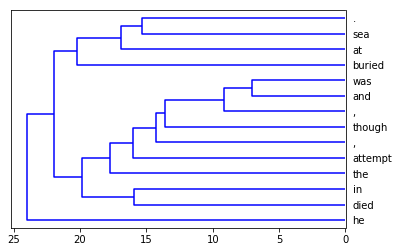

the latter applies to all 27 current member states of the european union .


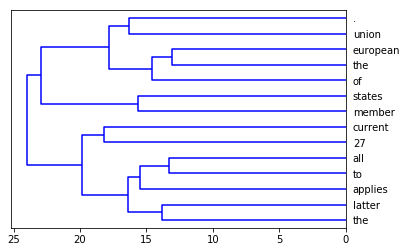

In [ ]:

for i in range(num_sentences):
    
    sent_embs = embeddings["elmo_representations"][0][i].detach().numpy()
    sent = sentences[i]
    print(" ".join(sent))
    plot_hierarchically(sent_embs, sent)
    
# sent_embs = embeddings["elmo_representations"][0][-1].detach().numpy()
# print(sent_embs.shape)
# print(" ".join(sent))
# plot_hierarchically(sent_embs, sent)
# plot_hierarchically(sent_embs, sent)